# 학습 관련 기술들
- 신경망 학습의 핵심 개념들을 정리 

## 6.1 매개변수 갱신 
- 신경망 학습의 목적은 가능한 낮은 매개변수를 찾는 것. 
- 확률적 경사 하강법(SGD) 이란 단순한 방법이지만 무작정 찾는것 보단 똑똑한 방법임

### 6.1.1 모험가 이야기 
- 눈과 지도가 없이 가장 낮은 골짜기를 찾아야하는 모험가 이때 할 수 있는 방법은 기울기를 느끼면서 깊은곳을 찾을 수있다 . 하지만 이 방법도 단점은 있다. 

### 6.1.2 확률적 경사 하강법(SGD)
- 기울기 * 학습률 을 반복적으로 사용하여 갑을 갱신 


In [ ]:
class SGD:
    #lr 학습률
    def __init__(self, lr = 0.01):
        self.lr = lr
    
    # 값을 갱신 
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### 6.1.4 모멘텀
- 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할

In [3]:
class Momentum:
    def __init__(self, lr = 0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr.grads[key]
            params[key] += self.v[key]

### 6.1.5 Adagrad
- 학습률의 값을 점차 줄여가면서 학습률에 따른 가중치 변화량을 효율적으로 조절

In [6]:
class AdaGrad:
    def __init__(self, lr = 0.01):
        self.lr = lr
        self.h  = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

### 6.1.6 Adam 
- 모멘텀과 AdaGrad를 합친것

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#1000* 100 데이터 들어감
x = np.random.randn(1000,100)
#연결선 100개 
node_num = 100
#신경층은 5개 
hidden_layer_size = 5
#활성화값 -> 계층사이에 흐르는 데이터
activations = {}

#1~5 5층
for i in  range(hidden_layer_size):
    #0 층까지 0 부터 시작 처음에는 안돌음
    if i != 0:
        #이전에 수행했던 활성화 함수 저장
        x = activations[i-1]
    # 100*100 으로 가중치 만듬
    # w = np.random.randn(node_num, node_num) * 1

    #가중치의 표준편차를 0.01 으로 변경
    
    w = np.random.randn(node_num, node_num) * 0.01

    # 합성곱 실행
    a = np.dot(x, w)
    # 출력층 만들기
    z = sigmoid(a)
    # 활성화 함수 저장
    activations[i] = z





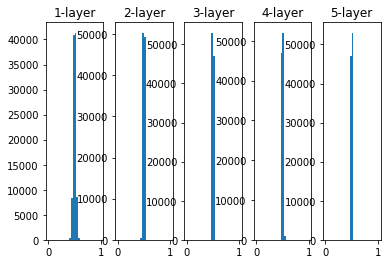

In [24]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range =(0,1))
plt.show()

### Xavier 초깃값
- 앞 계층의 노드가 n개 라면 표준편차는 1/sqru(n) 을 사용
- 앞 층의 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼짐.

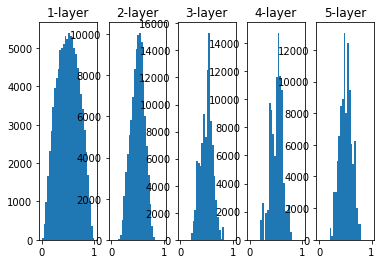

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#1000* 100 데이터 들어감
x = np.random.randn(1000,100)
#연결선 100개 
node_num = 100
#신경층은 5개 
hidden_layer_size = 5
#활성화값 -> 계층사이에 흐르는 데이터
activations = {}

#1~5 5층
for i in  range(hidden_layer_size):
    #0 층까지 0 부터 시작 처음에는 안돌음
    if i != 0:
        #이전에 수행했던 활성화 함수 저장
        x = activations[i-1]
    # 100*100 으로 가중치 만듬
    # w = np.random.randn(node_num, node_num) * 1

    #가중치의 표준편차를 0.01 으로 변경
    
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)

    # 합성곱 실행
    a = np.dot(x, w)
    # 출력층 만들기
    z = sigmoid(a)
    # 활성화 함수 저장
    activations[i] = z


for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range =(0,1))
plt.show()
